# Bi-LSTM (GloVe Embeddings)

### Libraries

In [1]:
import process_funcs as pf

import os
import pandas as pd
import numpy as np

### Parameters

In [2]:
max_len = 500 # maximum length of input vectors
max_words = 15000 # top n words in vocab 

### Reading Data

In [3]:
train_x, test_x, train_y, test_y, label_map  = pf.get_train_test()

In [4]:
#Sample instance
train_x[0][0:200]

['mps',
 'tout',
 'lords',
 'replacement',
 'plan',
 'group',
 'mps',
 'tried',
 'raise',
 'pressure',
 'tony',
 'blair',
 'reform',
 'house',
 'lords',
 'publishing',
 'detailed',
 'blueprint',
 'change',
 'cross',
 'party',
 'group',
 'unveiled',
 'draft',
 'bill',
 'proposing',
 'smaller',
 'second',
 'chamber',
 '70',
 'members',
 'would',
 'elected',
 'mps',
 'peers',
 'failed',
 'agree',
 'reform',
 'since',
 '1999',
 '600',
 'hereditaries',
 'lost',
 'seats',
 'group',
 'says',
 'win',
 'support',
 'removing',
 'last',
 '92',
 'hereditaries',
 'government',
 'postponed',
 'plans',
 'remove',
 'remaining',
 'hereditary',
 'peers',
 'said',
 'unlikely',
 'succeed',
 'opposition',
 'lords',
 'tony',
 'blair',
 'argued',
 'needs',
 'consensus',
 'reforms',
 'suggestions',
 'proposals',
 'changing',
 'least',
 'powers',
 'lords',
 'labour',
 'manifesto',
 'party',
 'group',
 'including',
 'tories',
 'ken',
 'clarke',
 'sir',
 'george',
 'young',
 'labour',
 'robin',
 'cook',
 'tony',

### Data Processing

In [5]:
train_x, tokenizer = pf.lstm_build_sequences(train_x, max_words, max_len)
test_x, tokenizer = pf.lstm_build_sequences(test_x, max_words, max_len, tokenizer=tokenizer)
word_index = tokenizer.word_index

list(word_index.items())[:5]

[('said', 1), ('mr', 2), ('would', 3), ('year', 4), ('also', 5)]

### Embeddings: GloVe

In [6]:
embeddings_index = pf.get_glove_embeddings()
embeddings_index['test']

array([-5.8342e-01,  4.8631e-01,  7.4230e-01,  1.7875e-01, -1.5873e+00,
       -3.7499e-01,  3.7902e-01,  7.0767e-01, -1.5402e+00,  7.4851e-01,
       -6.9018e-03, -4.4981e-01, -1.1125e-01,  1.7395e-01,  2.6005e-01,
        2.7065e-01,  7.8731e-01,  8.4877e-01, -9.9277e-02,  1.7688e-02,
        4.4389e-01, -8.7300e-01,  4.9640e-01, -1.8430e-01,  2.4894e-01,
        2.4073e-01,  8.4460e-02,  7.0786e-02, -2.3216e-01,  2.6685e-01,
       -2.3519e-01,  4.5211e-01, -3.9982e-01,  2.4936e-01,  7.3548e-01,
       -7.2352e-02, -8.1008e-01, -1.5256e-01, -1.0313e+00,  2.3067e-01,
       -1.1634e+00,  2.0387e-01,  4.2369e-01, -1.0589e+00,  2.9905e-01,
        2.0036e-01,  6.3371e-01, -5.7507e-01, -4.3730e-01, -5.5908e-01,
        5.0811e-01,  3.2673e-01, -4.3710e-01,  1.0702e+00, -1.0418e-01,
       -2.4432e+00, -1.0739e+00,  1.0881e-01,  1.5446e+00, -1.5633e-01,
       -3.7779e-01,  1.5111e-01,  5.8397e-01,  5.4980e-01,  2.3775e-01,
        8.8690e-01, -1.0220e-01, -4.1313e-02, -1.9496e-01, -1.37

In [7]:
embedding_dim, embedding_mat = pf.lstm_build_embed_mat(embeddings_index, word_index, max_words, 100)

### Modeling

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Flatten

#Architecture
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(5, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_mat])
model.layers[0].trainable = False

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          1500000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 5)                 1005      
Total params: 1,661,805
Trainable params: 1,661,805
Non-trainable params: 0
_________________________________________________________________


Train on 1072 samples, validate on 120 samples
Epoch 1/50
1072/1072 [==============================] - 5s 4ms/sample - loss: 1.4468 - acc: 0.4664 - val_loss: 1.0417 - val_acc: 0.8000
Epoch 2/50
1072/1072 [==============================] - 1s 1ms/sample - loss: 1.0292 - acc: 0.7024 - val_loss: 0.5643 - val_acc: 0.9167
Epoch 3/50
1072/1072 [==============================] - 1s 1ms/sample - loss: 0.5592 - acc: 0.8629 - val_loss: 0.8316 - val_acc: 0.7417
Epoch 4/50
1072/1072 [==============================] - 1s 1ms/sample - loss: 0.4758 - acc: 0.8750 - val_loss: 0.3280 - val_acc: 0.9333
Epoch 5/50
1072/1072 [==============================] - 1s 1ms/sample - loss: 0.3120 - acc: 0.9263 - val_loss: 0.3329 - val_acc: 0.9167
Epoch 6/50
1072/1072 [==============================] - 1s 1ms/sample - loss: 0.3579 - acc: 0.9039 - val_loss: 0.2917 - val_acc: 0.9167
Epoch 7/50
1072/1072 [==============================] - 1s 1ms/sample - loss: 0.2914 - acc: 0.9263 - val_loss: 0.2716 - val_acc: 0.9250
E

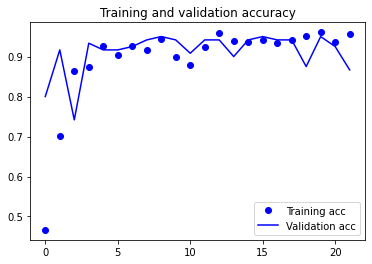

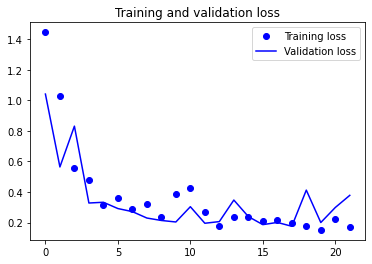

In [9]:
#Training
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import Callback, EarlyStopping

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
earlystopping = EarlyStopping(monitor = "val_loss", 
                                mode = "min", patience = 5, 
                                restore_best_weights = True)
history = model.fit(train_x, train_y.values,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.1, 
                    callbacks=[earlystopping])
accuracy, f1_score = pf.lstm_plot(model, history, test_x, test_y)

In [10]:
pf.store_results('bilstm', 'glove', model, accuracy, f1_score, tf_model=1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/bilstm-glove\assets
